In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import tanh
%matplotlib inline

plt.rcParams['axes.labelsize']        = 12
plt.rcParams['axes.titlesize']        = 12
plt.rcParams['xtick.labelsize']       = 12
plt.rcParams['ytick.labelsize']       = 12
plt.rcParams['font.family']           = 'serif'
plt.rcParams['font.size']             = 12

In [2]:
kk = np.load('aemulus_data/aemulus_nu_kbins.npy')

rho_zp25 = np.loadtxt('aemulus_data/rho_zp25.txt', unpack=True)
rho_zp5 = np.loadtxt('aemulus_data/rho_zp50.txt', unpack=True)
rho_z1 = np.loadtxt('aemulus_data/rho_z1.txt', unpack=True)

krho_fits = [1.11130298, 1.25281671, 1.62376071]

In [3]:
deltak=0.2
krho = 1.1

sigma_3p375 = 2*np.pi/(np.sqrt((1.5**3)*1e9*deltak)*kk**(3/2))
sigma_1 = 2*np.pi/(np.sqrt(1e9*deltak)*kk**(3/2))
sigma_p75 = 2*np.pi/(np.sqrt((0.75**3)*1e9*deltak)*kk**(3/2))
sigma_p5 = 2*np.pi/(np.sqrt((0.5**3)*1e9*deltak)*kk**(3/2))
sigma_p33 = 2*np.pi/(np.sqrt((0.33**3)*1e9*deltak)*kk**(3/2))

In [ ]:
def F(k, k0, deltak):
    out = [0.5*(1-tanh((kval-k0)/deltak)) for kval in k]
    return np.array(out)

betasq = np.array([betaval**2 for betaval in F(kk, 0.618, 0.167)])

In [5]:
def one_minus_rho(k, k_rho):
    return (k/k_rho)**2


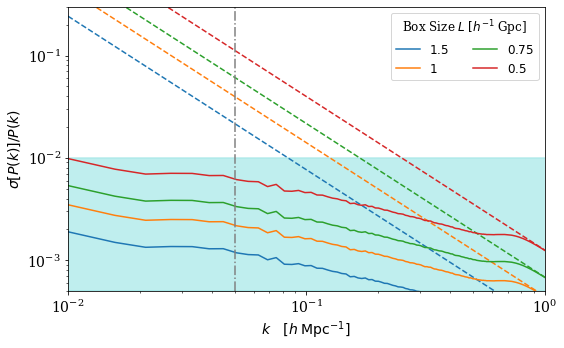

In [6]:
fig, axs= plt.subplots(figsize=(8, 5))

plt.loglog(kk, sigma_3p375, ls='--', color='C0')
plt.loglog(kk, sigma_1, ls='--', color='C1')
plt.loglog(kk, sigma_p75, ls='--', color='C2')
plt.loglog(kk, sigma_p5, ls='--', color='C3')

plt.loglog(kk, sigma_3p375*np.sqrt(1+betasq-2*np.sqrt(betasq)*rho_zp5), color='C0', label=r'$1.5$')
plt.loglog(kk, sigma_1*np.sqrt(1+betasq-2*np.sqrt(betasq)*rho_zp5), color='C1', label=r'$1$')
plt.loglog(kk, sigma_p75*np.sqrt(1+betasq-2*np.sqrt(betasq)*rho_zp5), color='C2', label=r'$0.75$')
plt.loglog(kk, sigma_p5*np.sqrt(1+betasq-2*np.sqrt(betasq)*rho_zp5), color='C3', label=r'$0.5$')

plt.fill_between(kk,5e-4,1e-2, color='c', alpha=0.25)
plt.axvline(0.05, color='grey', ls='-.')

plt.legend(title='Box Size $L\;[h^{-1}\;$Gpc]', ncol=2, title_fontsize=12, fontsize=12)
plt.ylabel(r'$\sigma[P(k)]/P(k)$', fontsize=14)
plt.xlim(1e-2, 1)
plt.ylim(5e-4, 3e-1)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.xlabel(r'$k\quad [h\;{\rm Mpc}^{-1}]$', fontsize=14)
plt.tight_layout()
plt.savefig('figures/pmm_zcv.pdf')
plt.show()

In [14]:
krhos = np.load('aemulus_data/krhos.npy') # 100 boxes, 30 redshifts
pk_kp1_vals = np.load('aemulus_data/pk_kp1.npy')


In [15]:
B, K, p = 3.083129565527269, 599.8708555735126, -0.5019862097239145

def powerLaw(x, B, K, p):
    return B*(x/K)**p


/var/folders/bl/xyxyl0d10p91mlywms1l_wph0000gn/T/ipykernel_23547/2123637718.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


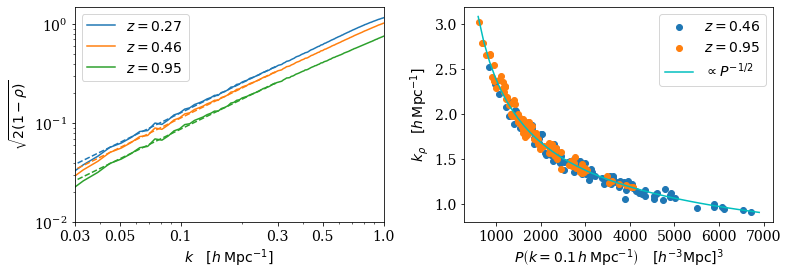

In [12]:
fig, axs= plt.subplots(1,2, figsize=(11, 4))

axs[0].loglog(kk[:], np.sqrt(2*(1-rho_zp25)), label=r'$z=0.27$')
axs[0].loglog(kk[:50], np.sqrt(2*one_minus_rho(kk[:50], krho_fits[0])), color='C0', ls='--')

axs[0].loglog(kk[:], np.sqrt(2*(1-rho_zp5)), label=r'$z=0.46$')
axs[0].loglog(kk[:50], np.sqrt(2*one_minus_rho(kk[:50], krho_fits[1])), color='C1', ls='--')

axs[0].loglog(kk[:], np.sqrt(2*(1-rho_z1)), label=r'$z=0.95$')
axs[0].loglog(kk[:50], np.sqrt(2*one_minus_rho(kk[:50], krho_fits[2])), color='C2', ls='--')

axs[0].set_ylabel(r'$\sqrt{2(1-\rho)}$', fontsize=14)
axs[0].set_xlabel(r'$k\quad [h\;{\rm Mpc}^{-1}]$', fontsize=14)
axs[0].set_xlim(0.03,1)
axs[0].set_ylim(1e-2, 1.5)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].set_xticks([0.03, 0.05, 0.1, 0.3, 0.5, 1.0], labels=['0.03', '0.05', '0.1', '0.3', '0.5', '1.0'])
axs[0].legend(fontsize=14)

pk_arr = np.linspace(600, 6900)

axs[1].scatter(pk_kp1_vals[0], krhos[:,-9], label=r'$z=0.46$')
axs[1].scatter(pk_kp1_vals[1], krhos[:,15], label=r'$z=0.95$')
axs[1].plot(pk_arr, powerLaw(pk_arr, B, K, p), color='c', label=r'$\propto P^{-1/2}$')
axs[1].set_ylabel(r'$k_{\rho}\quad [h\,\mathrm{Mpc}^{-1}]$', fontsize=14)
axs[1].set_xlabel(r'$P\left(k=0.1\,h\,{\rm Mpc}^{-1}\right) \quad [h^{-3}\mathrm{Mpc}]^3$', fontsize=14)
axs[1].legend(fontsize=14)

axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)

axs[1].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)

fig.tight_layout()
fig.savefig('figures/krho_Pk_fit.pdf')
fig.show()